# Task 1
(a) Default SVM: Implement a default SVM classifier. Train the model
using the dataset and obtain confusion matrices for training and
test datasets. Visualize decision surfaces for multi-calss classification, using blue, red, and orange colors to plot each class. Training
data points should be marked different than test data points for visualization of decision surfaces. Keep same colors and same markers
for each class for all results. 

# SVC with kernel linear

Training Confusion Matrix
[[3 0 1]
 [0 4 0]
 [0 0 4]]


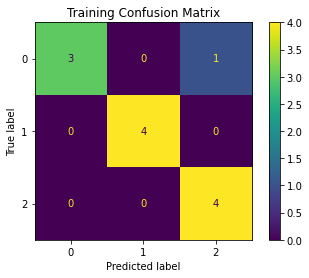

Testing Confusion Matrix
[[2 0 0]
 [0 2 0]
 [0 0 2]]


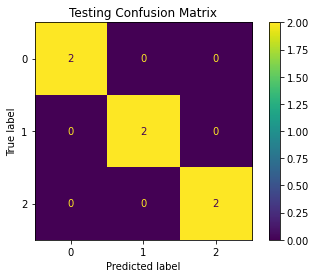

In [1]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, classification_report
from matplotlib import pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.calibration import CalibratedClassifierCV
from matplotlib.lines import Line2D

# Load the data
X_Train = np.array([[1.3, 3.3], [1.4, 2.5], [1.8, 2.8], [1.9, 3.1], [1.5, 1.5], [1.8, 2], [2.3, 1.9], [2.4, 1.4], [2.4, 2.4], [2.4, 3], [2.7, 2.7], [2.3, 3.2]])
Y_Train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2])
X_Test = np.array([[1.7, 2.5], [1.9, 2.7], [2, 2.15], [2.4, 2], [2.2, 3.25], [2.4, 2.25]])
Y_Test = np.array([0, 0, 1, 1, 2, 2])


# Create the classifier
clf = SVC(kernel='linear')
# clf = SVC(kernel="linear")

# Train the classifier
clf.fit(X_Train, Y_Train)

# Get the confusion matrix for the training dataset
con_train = confusion_matrix(Y_Train, clf.predict(X_Train))
print("Training Confusion Matrix")
print(con_train)
ConfusionMatrixDisplay.from_predictions(Y_Train, clf.predict(X_Train))
plt.title("Training Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


# Get the confusion matrix for the testing dataset
con_test = confusion_matrix(Y_Test, clf.predict(X_Test))
print("Testing Confusion Matrix")
print(con_test)
ConfusionMatrixDisplay.from_predictions(Y_Test, clf.predict(X_Test))
plt.title("Testing Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()



X_all = np.concatenate((X_Train, X_Test))
Y_all = np.concatenate((Y_Train, Y_Test))




In [2]:
def plot_decision_boundary(clf, X_Train, X_Test, Y_Train, Y_Test, X_all, Y_all, class_names, my_colors=['blue', 'red', 'orange'], MY_xlabel="feature 1", MY_ylabel="feature 2", titles='Decision boundaries'):
    # Create a mesh grid to plot the decision boundary
    h = 0.008
    x_min, x_max = X_all[:, 0].min() - 0.6, X_all[:, 0].max() + 0.6
    y_min, y_max = X_all[:, 1].min() - 0.6, X_all[:, 1].max() + 0.6
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the class labels for the mesh grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Define a colormap for the scatter plot
    cmap = matplotlib.colors.ListedColormap(my_colors)

    fig, ax = plt.subplots(figsize=(10, 8))
    # Plot the decision boundaries and the data points notice that Training data has circle Shape but Testing data has Square shape
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap)
    scatter_train = ax.scatter(X_Train[:, 0], X_Train[:, 1], c=Y_Train, marker='o', cmap=cmap, edgecolors="black", s=50, label='Train Data')
    scatter_test = ax.scatter(X_Test[:, 0], X_Test[:, 1], c=Y_Test, marker='s', cmap=cmap, edgecolors="black", s=50, label='Test Data')
    plt.xlabel(MY_xlabel)
    plt.ylabel(MY_ylabel)

    # Create a legend with class names and colors
    handles = [scatter_train, scatter_test]
    labels = ['Train Data', 'Test Data']
    for class_name, color in zip(class_names, my_colors):
        handles.append(Line2D([0], [0], marker='o', color='w', label=class_name, markerfacecolor=color, markersize=8))
        labels.append(class_name)

    ax.legend(handles, labels, loc='upper right')
    plt.title(titles)
    plt.show()

### Accuracy function

In [3]:
def getAccuracy(model, x, y):
    return (model.score(x,y)*100)

# Plot Descision Boundry and getting Accuracy of Model

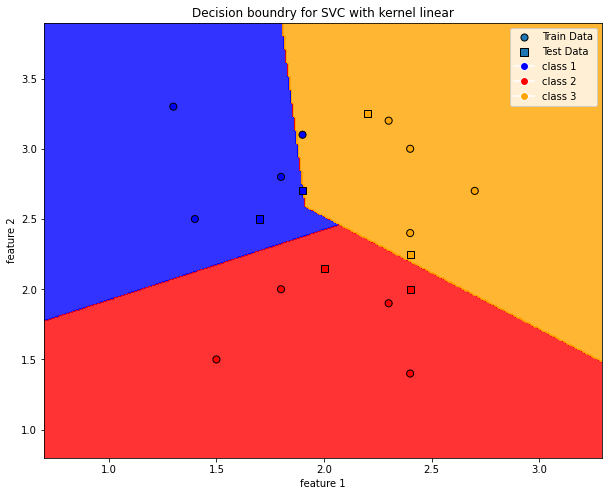

Accuracy of Train where kernel linear =  91.66666666666666
Accuracy of Test where kernel linear =  100.0


In [4]:
plot_decision_boundary(clf, X_Train, X_Test, Y_Train, Y_Test,X_all, Y_all,class_names=['class 1','class 2','class 3'],titles='Decision boundry for SVC with kernel linear')
print("Accuracy of Train where kernel linear = ",getAccuracy(clf, X_Train, Y_Train))
print("Accuracy of Test where kernel linear = ",getAccuracy(clf, X_Test, Y_Test))

# Default SVC with default c value = 1

Training Confusion Matrix
[[4 0 0]
 [0 4 0]
 [0 0 4]]


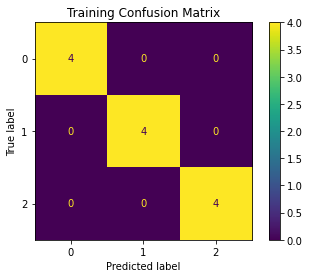

Testing Confusion Matrix
[[2 0 0]
 [0 2 0]
 [0 0 2]]


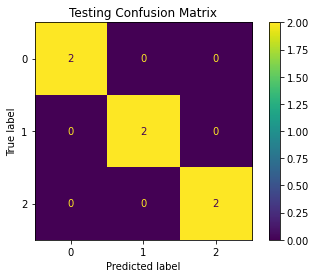

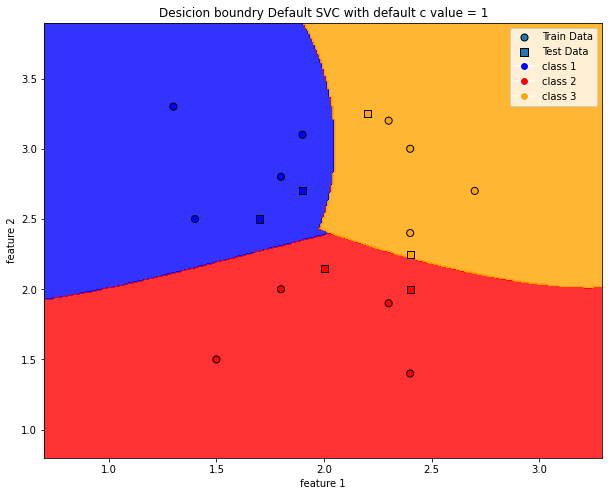

Accuracy of Train for default SVC =  100.0
Accuracy of Test for default SVC =  100.0


In [5]:
# Create the classifier
clf = SVC()
# clf = SVC(kernel="linear")

# Train the classifier
clf.fit(X_Train, Y_Train)

# Get the confusion matrix for the training dataset
con_train = confusion_matrix(Y_Train, clf.predict(X_Train))
print("Training Confusion Matrix")
print(con_train)
ConfusionMatrixDisplay.from_predictions(Y_Train, clf.predict(X_Train))
plt.title("Training Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


# Get the confusion matrix for the testing dataset
con_test = confusion_matrix(Y_Test, clf.predict(X_Test))
print("Testing Confusion Matrix")
print(con_test)
ConfusionMatrixDisplay.from_predictions(Y_Test, clf.predict(X_Test))
plt.title("Testing Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()



X_all = np.concatenate((X_Train, X_Test))
Y_all = np.concatenate((Y_Train, Y_Test))

plot_decision_boundary(clf, X_Train, X_Test, Y_Train, Y_Test,X_all, Y_all,class_names=['class 1','class 2','class 3'],titles='Desicion boundry Default SVC with default c value = 1')
print("Accuracy of Train for default SVC = ",getAccuracy(clf, X_Train, Y_Train))
print("Accuracy of Test for default SVC = ",getAccuracy(clf, X_Test, Y_Test))

# Task 1
(b) One-vs-Rest SVM and Perceptron: Extend the analysis using the
one-vs-rest strategy for SVM and Perceptron algorithms. Training
and test data should be labeled for one vs rest as binary classifier.
For example, class 0 vs rest means class 0 will be labeled as 1 and
the rest (classes 1 and 2) will be labeled as 0. Obtain confusion
matrices for both training and test datasets. Compare and analyze
SVM and Perceptron results. Visualize decision surfaces using the
color scheme mentioned earlier.

### One-vs-Rest SVM

Classification Report of train for feature:  0
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      0.50      0.67         4

    accuracy                           0.83        12
   macro avg       0.90      0.75      0.78        12
weighted avg       0.87      0.83      0.81        12

Confusion Matrix of train for feature:  0
Accuracy of Train =  83.33333333333334


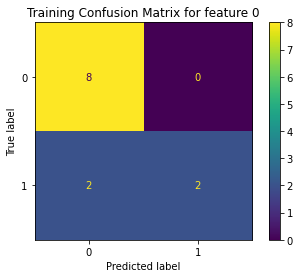

Classification Report of test for feature:  0
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       0.00      0.00      0.00         2

    accuracy                           0.67         6
   macro avg       0.33      0.50      0.40         6
weighted avg       0.44      0.67      0.53         6

Confusion Matrix of test for feature:  0
Accuracy of Test =  66.66666666666666


z:\Programs\Anakonda1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
z:\Programs\Anakonda1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
z:\Programs\Anakonda1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


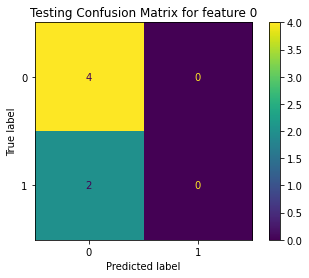

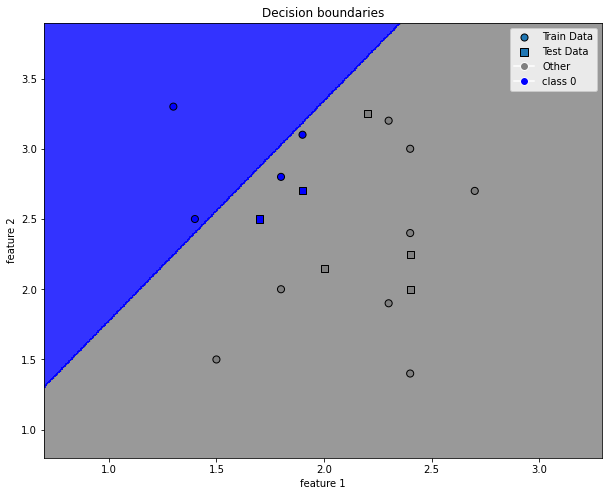

Classification Report of train for feature:  1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         4

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Confusion Matrix of train for feature:  1
Accuracy of Train =  100.0


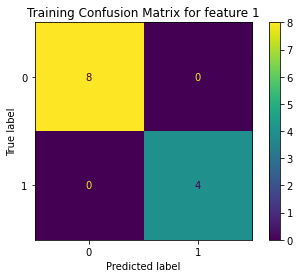

Classification Report of test for feature:  1
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.50      0.67         2

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6

Confusion Matrix of test for feature:  1
Accuracy of Test =  83.33333333333334


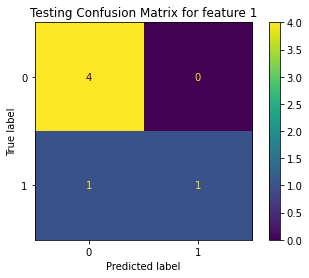

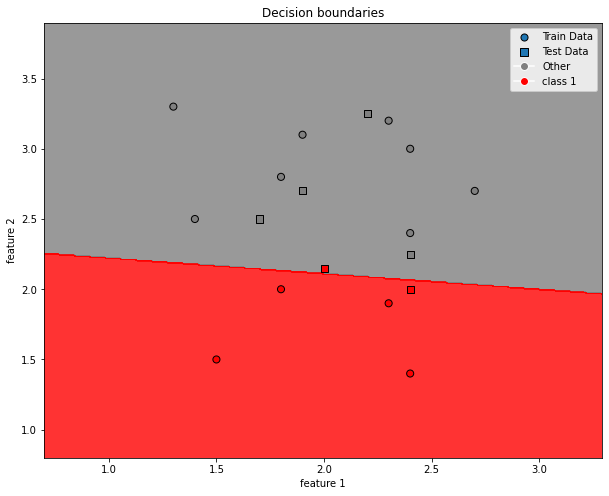

Classification Report of train for feature:  2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         4

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Confusion Matrix of train for feature:  2
Accuracy of Train =  100.0


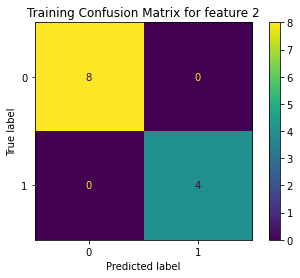

Classification Report of test for feature:  2
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.50      0.67         2

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6

Confusion Matrix of test for feature:  2
Accuracy of Test =  83.33333333333334


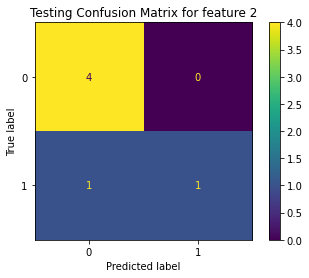

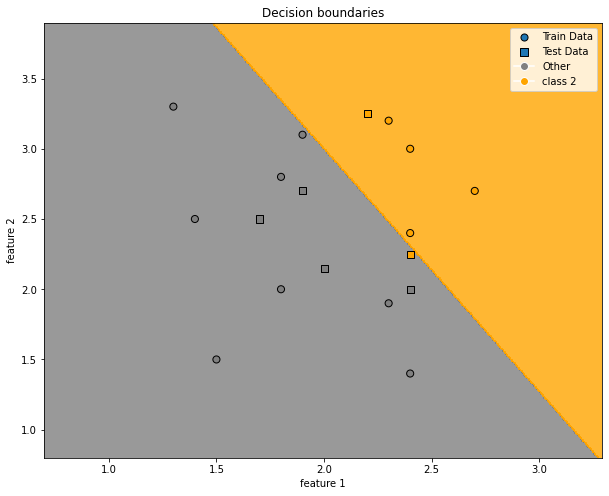

In [6]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Create an array to store the 3 SVC classifiers for both train and test
classifiers_Train = dict({})
classifiers_Test = dict({})
classifiers_XXX = dict({})


x_min, x_max = X_all[:, 0].min() - 0.6, X_all[:, 0].max() + 0.6
y_min, y_max = X_all[:, 1].min() - 0.6, X_all[:, 1].max() + 0.6
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.005), np.arange(y_min, y_max, 0.005))
XXX=np.c_[xx.ravel(), yy.ravel()]



# Define list of colors used in each classification
colors=[['gray','blue'],['gray','red'],['gray','orange']]

# Creating for loop to make 3 binary classification model
for i in range(3):
    clf = SVC(probability=True,kernel="linear")
    Y_binary_Train = [int(c==i) for c in Y_Train]
    Y_binary_Test = [int(c==i) for c in Y_Test]
    clf.fit(X_Train, Y_binary_Train)
    
    # we want to predict Y_train , Y_test and they are in pairs
    prediction_Train = clf.predict_proba(X_Train)
    prediction_Test = clf.predict_proba(X_Test)
    prediction_XXX = clf.predict_proba(XXX)
    
        
    
    # Here we take probability of 1 so we can store in in array for train and test
    classifiers_Train[i]=[p[1]for p in prediction_Train]
    classifiers_Test[i]=[p[1]for p in prediction_Test]
    classifiers_XXX[i]=[p[1]for p in prediction_XXX]
    
    
    # Print Classification Report of Train
    print("Classification Report of train for feature: ", i)
    Y_pred_train = clf.predict(X_Train)
    print(classification_report(Y_binary_Train, Y_pred_train))
    
    # Print Confusion matrix of Train
    print("Confusion Matrix of train for feature: ", i)
    con_train = confusion_matrix(Y_binary_Train, clf.predict(X_Train))
    ConfusionMatrixDisplay.from_predictions(Y_binary_Train, clf.predict(X_Train))
    print("Accuracy of Train = ",getAccuracy(clf, X_Train, Y_binary_Train))
    plt.title("Training Confusion Matrix for feature "+str(i))
    plt.show()
    
    # Print Confusion matrix of Test
    print("Classification Report of test for feature: ", i)
    Y_pred_test = clf.predict(X_Test)
    print(classification_report(Y_binary_Test, Y_pred_test))
    con_train = confusion_matrix(Y_binary_Test, Y_pred_test)
    
    
    # Print Confusion matrix of Train
    print("Confusion Matrix of test for feature: ", i)
    con_train = confusion_matrix(Y_binary_Test, clf.predict(X_Test))
    ConfusionMatrixDisplay.from_predictions(Y_binary_Test, clf.predict(X_Test))
    print("Accuracy of Test = ",getAccuracy(clf, X_Test, Y_binary_Test))
    plt.title("Testing Confusion Matrix for feature "+str(i))
    plt.show()
    
    
    ###################################################
    # Create a mesh grid to plot the decision boundary
    plot_decision_boundary(clf, X_Train, X_Test, Y_binary_Train, Y_binary_Test,X_all, Y_all,my_colors=colors[i],class_names=['Other','class '+str(i)])
    






# Function to Plot Descision Boundry for Scaler One VS Rest Perceptron

In [7]:
def plot_decision_boundary_Scaler(clf, X_Train, X_Test, Y_Train, Y_Test, X_all, Y_all,my_colors=['blue', 'red', 'orange']):
    # Create a mesh grid to plot the decision boundary
    h = 0.02
    x_min, x_max = X_all[:, 0].min() - 0.6, X_all[:, 0].max() + 0.6
    y_min, y_max = X_all[:, 1].min() - 0.6, X_all[:, 1].max() + 0.6
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    
    # For perceptron
    scaler=StandardScaler()
    scaler.fit(X_Train)
    
    
    # Predict the class labels for the mesh grid
    Z = clf.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    # Define a colormap for the scatter plot
    #my_colors = ['blue', 'red', 'orange']
    cmap = matplotlib.colors.ListedColormap(my_colors)
    
    
    
    
    fig = plt.figure(figsize=(10, 8))
    # Plot the decision boundaries and the data points notice that Training data has circle Shape but Testing data has Square shape
    plt.contourf(xx, yy, Z,  alpha=0.8, cmap=cmap)
    plt.scatter(X_Train[:, 0], X_Train[:, 1], c=Y_Train,marker='o',cmap=cmap, edgecolors="black", s=50, label = 'Train Data')
    plt.scatter(X_Test[:, 0], X_Test[:, 1], c=Y_Test,marker='s',cmap=cmap, edgecolors="black", s=50, label = 'Test Data')
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    plt.legend(title='Data points')
    plt.title('Decision boundaries')
    plt.show()

# Perceptron One VS Rest

Classification Report of train for feature:  0
              precision    recall  f1-score   support

           0       0.73      1.00      0.84         8
           1       1.00      0.25      0.40         4

    accuracy                           0.75        12
   macro avg       0.86      0.62      0.62        12
weighted avg       0.82      0.75      0.69        12

Confusion Matrix of train for feature:  0
Accuracy of Train =  91.66666666666666


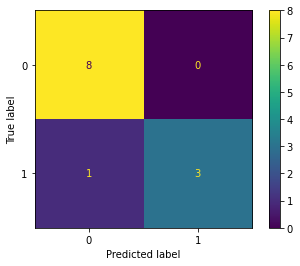

Classification Report of test for feature:  0
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       0.00      0.00      0.00         2

    accuracy                           0.67         6
   macro avg       0.33      0.50      0.40         6
weighted avg       0.44      0.67      0.53         6

Confusion Matrix of test for feature:  0
Accuracy of Test =  66.66666666666666


z:\Programs\Anakonda1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
z:\Programs\Anakonda1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
z:\Programs\Anakonda1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


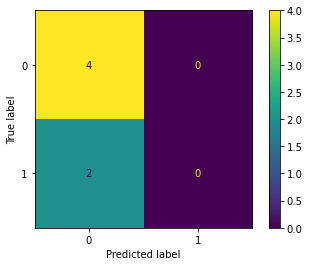

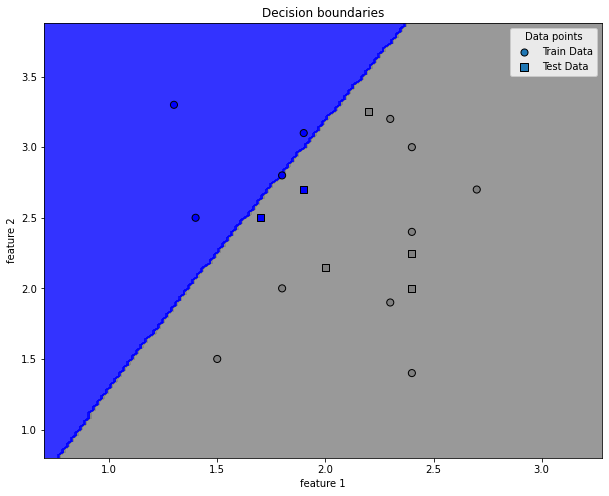

Classification Report of train for feature:  1
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         8
           1       0.00      0.00      0.00         4

    accuracy                           0.67        12
   macro avg       0.33      0.50      0.40        12
weighted avg       0.44      0.67      0.53        12

Confusion Matrix of train for feature:  1
Accuracy of Train =  100.0


z:\Programs\Anakonda1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
z:\Programs\Anakonda1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
z:\Programs\Anakonda1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


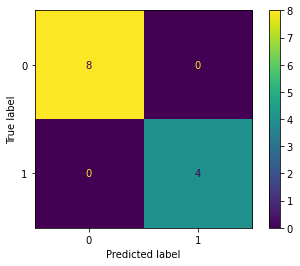

Classification Report of test for feature:  1
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       0.00      0.00      0.00         2

    accuracy                           0.67         6
   macro avg       0.33      0.50      0.40         6
weighted avg       0.44      0.67      0.53         6

Confusion Matrix of test for feature:  1


z:\Programs\Anakonda1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
z:\Programs\Anakonda1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
z:\Programs\Anakonda1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of Test =  66.66666666666666


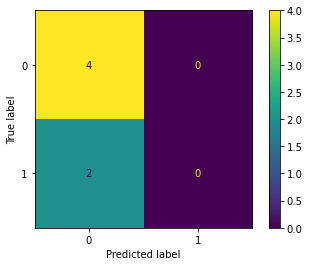

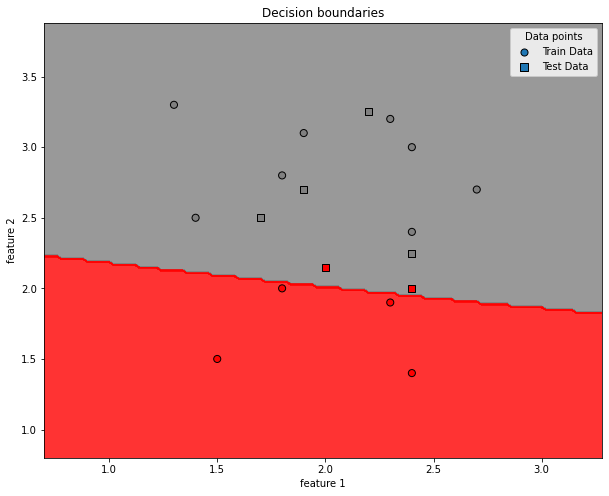

Classification Report of train for feature:  2
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.33      1.00      0.50         4

    accuracy                           0.33        12
   macro avg       0.17      0.50      0.25        12
weighted avg       0.11      0.33      0.17        12

Confusion Matrix of train for feature:  2
Accuracy of Train =  91.66666666666666


z:\Programs\Anakonda1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
z:\Programs\Anakonda1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
z:\Programs\Anakonda1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


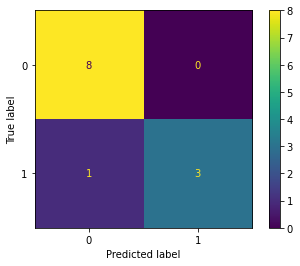

Classification Report of test for feature:  2
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.33      1.00      0.50         2

    accuracy                           0.33         6
   macro avg       0.17      0.50      0.25         6
weighted avg       0.11      0.33      0.17         6

Confusion Matrix of test for feature:  2


z:\Programs\Anakonda1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
z:\Programs\Anakonda1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
z:\Programs\Anakonda1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of Test =  83.33333333333334


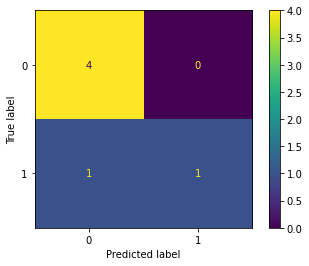

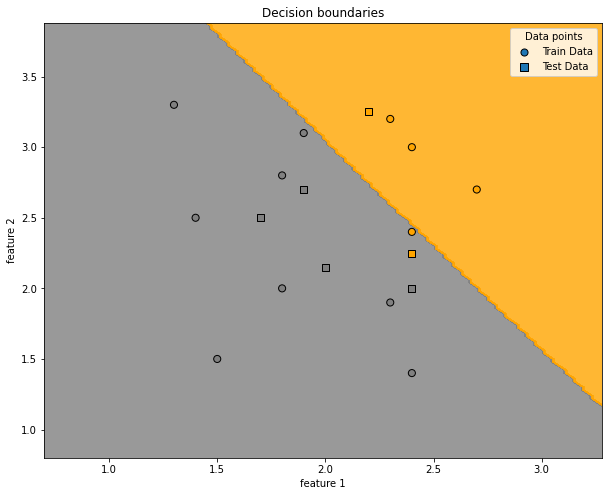

In [8]:

# Create an array to store the 3 SVC classifiers for both train and test
classifiers_Train = dict({})
classifiers_Test = dict({})
classifiers_XXX = dict({})


# Standardize the data
scaler = StandardScaler()
X_Train_Scaler = scaler.fit_transform(X_Train)
X_Test_Scaler = scaler.transform(X_Test)

x_min, x_max = X_all[:, 0].min() - 0.6, X_all[:, 0].max() + 0.6
y_min, y_max = X_all[:, 1].min() - 0.6, X_all[:, 1].max() + 0.6
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.005), np.arange(y_min, y_max, 0.005))
XXX=np.c_[xx.ravel(), yy.ravel()]



# Creating for loop to make 3 binary classification model


colors=[['gray','blue'],['gray','red'],['gray','orange']]
for i in range(3):
    clf = CalibratedClassifierCV(Perceptron(),cv=3)
    Y_binary_Train = [int(c==i) for c in Y_Train]
    Y_binary_Test = [int(c==i) for c in Y_Test]
    clf.fit(X_Train_Scaler, Y_binary_Train)
    
    # we want to predict Y_train , Y_test and they are in pairs
    prediction_Train = clf.predict_proba(X_Train_Scaler)
    prediction_Test = clf.predict_proba(X_Test_Scaler)
    prediction_XXX = clf.predict_proba(scaler.transform(XXX))
    
        
    
    # Here we take probability of 1 so we can store in in array for train and test
    classifiers_Train[i]=[p[1]for p in prediction_Train]
    classifiers_Test[i]=[p[1]for p in prediction_Test]
    classifiers_XXX[i]=[p[1]for p in prediction_XXX]
    
    
    print("Classification Report of train for feature: ", i)
    Y_pred_train = clf.predict(X_Train)
    print(classification_report(Y_binary_Train, Y_pred_train))
    
    # Print Confusion matrix of Train
    print("Confusion Matrix of train for feature: ", i)
    con_train = confusion_matrix(Y_binary_Train, clf.predict(X_Train_Scaler))
    ConfusionMatrixDisplay.from_predictions(Y_binary_Train, clf.predict(X_Train_Scaler))
    print("Accuracy of Train = ",getAccuracy(clf, X_Train_Scaler, Y_binary_Train))
    
    plt.show()
    
    
    print("Classification Report of test for feature: ", i)
    Y_pred_test = clf.predict(X_Test)
    print(classification_report(Y_binary_Test, Y_pred_test))
    
    
    # Print Confusion matrix of Train
    print("Confusion Matrix of test for feature: ", i)
    con_train = confusion_matrix(Y_binary_Test, clf.predict(X_Test_Scaler))
    ConfusionMatrixDisplay.from_predictions(Y_binary_Test, clf.predict(X_Test_Scaler))
    print("Accuracy of Test = ",getAccuracy(clf, X_Test_Scaler, Y_binary_Test))
     
    plt.show()
    
    
    ###################################################
    # Create a mesh grid to plot the decision boundary
    plot_decision_boundary_Scaler(clf, X_Train, X_Test, Y_binary_Train, Y_binary_Test,X_all, Y_all,my_colors=colors[i])

# Aggregating result to make list for 3 predictions probability:
(c) Aggregate results from the one-vs-rest strategy for SVM and Perceptron. Calculate the confusion matrix and visualize the decision
surface for the aggregated results. Analyze performance and compare with section (a) solution. 

# SVC Aggregation of prediction for train and test

In [9]:
# Here we aggregate result to make 1 list that have probability for every single element in y train
agg_prediction_Train = list(zip(*classifiers_Train.values()))
print("AGG of prediction train  = ",agg_prediction_Train)

# Here we aggregate result to make 1 list that have probability for every single element in y test
agg_prediction_Test = list(zip(*classifiers_Test.values()))
print("AGG of prediction test = ",agg_prediction_Test)


agg_prediction_XXX=list(zip(*classifiers_XXX.values()))

AGG of prediction train  =  [(0.8325869123289992, 0.14525653898979765, 0.3892093605938309), (0.613758808691894, 0.357124327593724, 0.321035594227357), (0.49587802091602806, 0.24352876844283047, 0.41775013669559263), (0.5281642194167208, 0.16692343223307163, 0.484496458723563), (0.32530550388989815, 0.7086266228291142, 0.26039724091361827), (0.29898835886419434, 0.5164380647351092, 0.3212773140774566), (0.12341062124851983, 0.5224137594395334, 0.3955483403727455), (0.0667811160311957, 0.6792597395352816, 0.34812118340662673), (0.1591074288507308, 0.3433760683407911, 0.49240094311948757), (0.2647977667557158, 0.1765316412736351, 0.5793033864792915), (0.12408831833949992, 0.24375825828241102, 0.5938960867255463), (0.3550008488858238, 0.138519717262103, 0.5872776333640458)]
AGG of prediction test =  [(0.46501442368338536, 0.3410423916808007, 0.3605336210863131), (0.4179180075567015, 0.2683973736909886, 0.4246264163339219), (0.24853180965389265, 0.4494118521812703, 0.36970428235186864), (0.

# Getting final probability of Aggregated One VS All For SVC

[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2]
[0, 2, 1, 1, 2, 2]


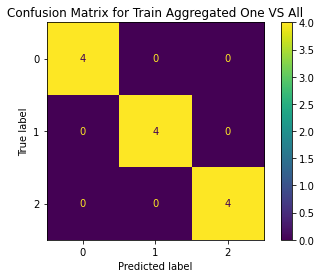

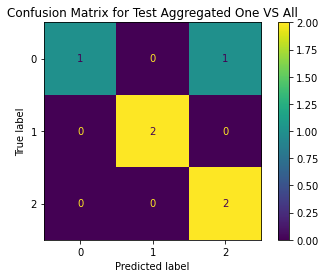

In [10]:
Max_yTrain=[np.argmax(i) for  i in agg_prediction_Train]
Max_yTest=[np.argmax(i) for  i in agg_prediction_Test]
Max_ZZZ=[np.argmax(i) for  i in agg_prediction_XXX]
print(Max_yTrain)
print(Max_yTest)
ConfusionMatrixDisplay.from_predictions(y_pred=Max_yTrain,y_true=Y_Train)
plt.title('Confusion Matrix for Train Aggregated One VS All')
plt.show()
ConfusionMatrixDisplay.from_predictions(y_pred=Max_yTest,y_true=Y_Test)
plt.title('Confusion Matrix for Test Aggregated One VS All')
plt.show()

# Function to plot Decision Boundry FOR SVC

In [11]:
def plot_decision_boundary_agg(ZZZ, X_Train, X_Test, Y_Train, Y_Test, X_all, Y_all,my_colors=['blue', 'red', 'orange']):
    # Create a mesh grid to plot the decision boundary
    h = 0.005
    x_min, x_max = X_all[:, 0].min() - 0.6, X_all[:, 0].max() + 0.6
    y_min, y_max = X_all[:, 1].min() - 0.6, X_all[:, 1].max() + 0.6
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the class labels for the mesh grid
    Z=np.array(ZZZ)
    Z = Z.reshape(xx.shape)    
    
    # Here we aggregate result to make 1 list that have probability for every single element in y train
    agg_prediction_Train = list(zip(*classifiers_Train.values()))
    print("AGG of prediction train  = ",agg_prediction_Train)

    # Here we aggregate result to make 1 list that have probability for every single element in y test
    agg_prediction_Test = list(zip(*classifiers_Test.values()))
    print("AGG of prediction test = ",agg_prediction_Test)
    

    # Define a colormap for the scatter plot
    #my_colors = ['blue', 'red', 'orange']
    cmap = matplotlib.colors.ListedColormap(my_colors)

    
    fig = plt.figure(figsize=(10, 8))
    # Plot the decision boundaries and the data points notice that Training data has circle Shape but Testing data has Square shape
    plt.contourf(xx, yy, Z,  alpha=0.8, cmap=cmap)
    plt.scatter(X_Train[:, 0], X_Train[:, 1], c=Y_Train,marker='o',cmap=cmap, edgecolors="black", s=50, label = 'Train Data')
    plt.scatter(X_Test[:, 0], X_Test[:, 1], c=Y_Test,marker='s',cmap=cmap, edgecolors="black", s=50, label = 'Test Data')
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    plt.legend(title='Data points')
    plt.title('Decision boundaries')
    plt.show()

# Aggregation plot for One vs All SVC 

AGG of prediction train  =  [(0.8325869123289992, 0.14525653898979765, 0.3892093605938309), (0.613758808691894, 0.357124327593724, 0.321035594227357), (0.49587802091602806, 0.24352876844283047, 0.41775013669559263), (0.5281642194167208, 0.16692343223307163, 0.484496458723563), (0.32530550388989815, 0.7086266228291142, 0.26039724091361827), (0.29898835886419434, 0.5164380647351092, 0.3212773140774566), (0.12341062124851983, 0.5224137594395334, 0.3955483403727455), (0.0667811160311957, 0.6792597395352816, 0.34812118340662673), (0.1591074288507308, 0.3433760683407911, 0.49240094311948757), (0.2647977667557158, 0.1765316412736351, 0.5793033864792915), (0.12408831833949992, 0.24375825828241102, 0.5938960867255463), (0.3550008488858238, 0.138519717262103, 0.5872776333640458)]
AGG of prediction test =  [(0.46501442368338536, 0.3410423916808007, 0.3605336210863131), (0.4179180075567015, 0.2683973736909886, 0.4246264163339219), (0.24853180965389265, 0.4494118521812703, 0.36970428235186864), (0.

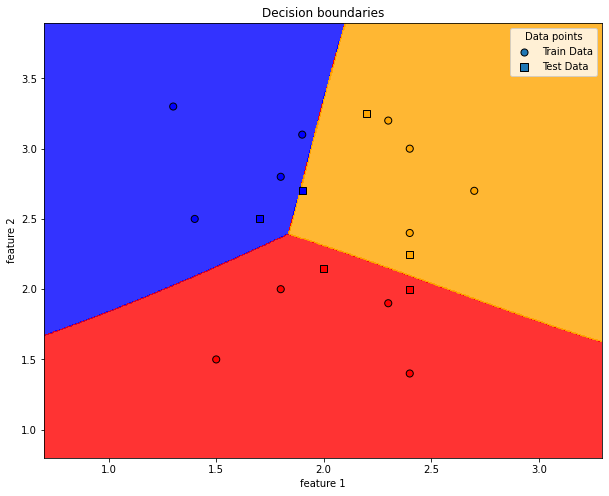

In [12]:
plot_decision_boundary_agg(Max_ZZZ, X_Train, X_Test, Y_Train, Y_Test, X_all, Y_all,my_colors=['blue', 'red', 'orange'])

## Accuracy for One VS All for SVC After Aggregation

In [13]:
print("Training score for SVC After Aggregation: ")
accuracy_score(Y_Train, Max_yTrain)

Training score for SVC After Aggregation: 


1.0

In [14]:
print("Testing score for SVC After Aggregation: ")
accuracy_score(Y_Test, Max_yTest)

Testing score for SVC After Aggregation: 


0.8333333333333334

# Aggregation of Perceptron

AGG of prediction train  =  [(0.8325869123289992, 0.14525653898979765, 0.3892093605938309), (0.613758808691894, 0.357124327593724, 0.321035594227357), (0.49587802091602806, 0.24352876844283047, 0.41775013669559263), (0.5281642194167208, 0.16692343223307163, 0.484496458723563), (0.32530550388989815, 0.7086266228291142, 0.26039724091361827), (0.29898835886419434, 0.5164380647351092, 0.3212773140774566), (0.12341062124851983, 0.5224137594395334, 0.3955483403727455), (0.0667811160311957, 0.6792597395352816, 0.34812118340662673), (0.1591074288507308, 0.3433760683407911, 0.49240094311948757), (0.2647977667557158, 0.1765316412736351, 0.5793033864792915), (0.12408831833949992, 0.24375825828241102, 0.5938960867255463), (0.3550008488858238, 0.138519717262103, 0.5872776333640458)]
AGG of prediction test =  [(0.46501442368338536, 0.3410423916808007, 0.3605336210863131), (0.4179180075567015, 0.2683973736909886, 0.4246264163339219), (0.24853180965389265, 0.4494118521812703, 0.36970428235186864), (0.

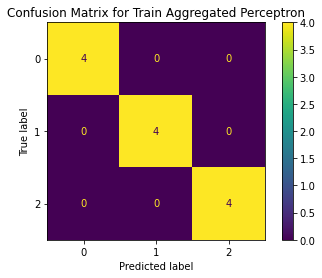

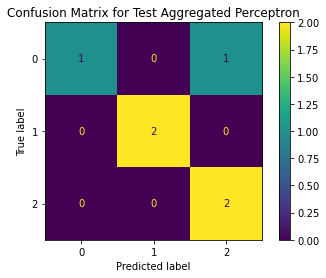

In [15]:
# Here we aggregate result to make 1 list that have probability for every single element in y train
agg_prediction_Train = list(zip(*classifiers_Train.values()))
print("AGG of prediction train  = ",agg_prediction_Train)

# Here we aggregate result to make 1 list that have probability for every single element in y test
agg_prediction_Test = list(zip(*classifiers_Test.values()))
print("AGG of prediction test = ",agg_prediction_Test)


agg_prediction_XXX=list(zip(*classifiers_XXX.values()))



Max_yTrain=[np.argmax(i) for  i in agg_prediction_Train]
Max_yTest=[np.argmax(i) for  i in agg_prediction_Test]
Max_ZZZ=[np.argmax(i) for  i in agg_prediction_XXX]
print(Max_yTrain)
print(Max_yTest)
ConfusionMatrixDisplay.from_predictions(y_pred=Max_yTrain,y_true=Y_Train)
plt.title('Confusion Matrix for Train Aggregated Perceptron')
plt.show()
ConfusionMatrixDisplay.from_predictions(y_pred=Max_yTest,y_true=Y_Test)
plt.title('Confusion Matrix for Test Aggregated Perceptron')
plt.show()


# Here we plot_decision_boundary_agg

AGG of prediction train  =  [(0.8325869123289992, 0.14525653898979765, 0.3892093605938309), (0.613758808691894, 0.357124327593724, 0.321035594227357), (0.49587802091602806, 0.24352876844283047, 0.41775013669559263), (0.5281642194167208, 0.16692343223307163, 0.484496458723563), (0.32530550388989815, 0.7086266228291142, 0.26039724091361827), (0.29898835886419434, 0.5164380647351092, 0.3212773140774566), (0.12341062124851983, 0.5224137594395334, 0.3955483403727455), (0.0667811160311957, 0.6792597395352816, 0.34812118340662673), (0.1591074288507308, 0.3433760683407911, 0.49240094311948757), (0.2647977667557158, 0.1765316412736351, 0.5793033864792915), (0.12408831833949992, 0.24375825828241102, 0.5938960867255463), (0.3550008488858238, 0.138519717262103, 0.5872776333640458)]
AGG of prediction test =  [(0.46501442368338536, 0.3410423916808007, 0.3605336210863131), (0.4179180075567015, 0.2683973736909886, 0.4246264163339219), (0.24853180965389265, 0.4494118521812703, 0.36970428235186864), (0.

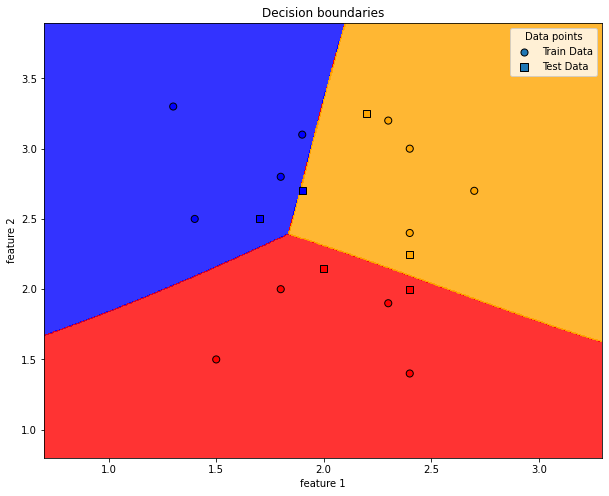

In [16]:
plot_decision_boundary_agg(Max_ZZZ, X_Train, X_Test, Y_Train, Y_Test, X_all, Y_all,my_colors=['blue', 'red', 'orange'])

# Accuracy for Training and Testing Perceptron

In [17]:
print("Training score for Perceptron After Aggregation: ")
accuracy_score(Y_Train, Max_yTrain)

Training score for Perceptron After Aggregation: 


1.0

In [18]:
print("Testing score for SVC After Aggregation: ")
accuracy_score(Y_Test, Max_yTest)

Testing score for SVC After Aggregation: 


0.8333333333333334

# Task1
(d) Determine the reason why SVM performance in section (a) is different than aggregated performance of SVM in section (c). Refine
the default SVM by selecting the appropriate parameter. Train the
SVM model with selected parameters and evaluate its performance.
Obtain confusion matrices and decision surfaces for multi-class classification. Compare results with the default SVM and discuss the
impact of parameter selection.

## Reason of performance for default and aggregated SVC
- The Accuracy of Train in SVC with linear kernel =  91.66666666666666%
- The Accuracy of Train in SVC with linear kernel =  100%
- The Accuracy of for SVC After Aggregation for training = 100%
- The Accuracy of for SVC After Aggregation for testing = 8333333333333334%
- The reason for this performance because the parameter of regularization C=1 in default SVC for all classifiers

### The regularization is a technique used to prevent overfitting of a model to the training data. Overfitting occurs when a model becomes too complex and starts to fit the noise in the data

But in aggregated SVC every single class has it's own regularization parameter so when we aggregate it the result will have high accuracy

# Refine Default SVC with following attributes
 - we train SVC with appropiate parameter
 - we use different higher regularization parameter where C = 100
 - after that we are evaluating it's performance by getting accuracy of train and test
 - Obtaining confusion metrices and decision surfaces for both training and testing 

Training Confusion Matrix
[[4 0 0]
 [0 4 0]
 [0 0 4]]


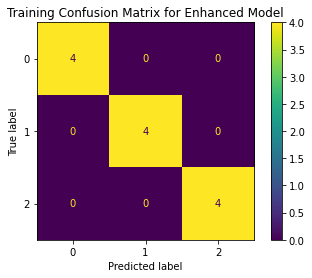

Classification Report of test for enhanced model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Testing Confusion Matrix
[[2 0 0]
 [0 2 0]
 [0 0 2]]


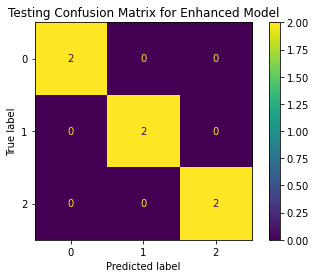

Classification Report of test for enhanced model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



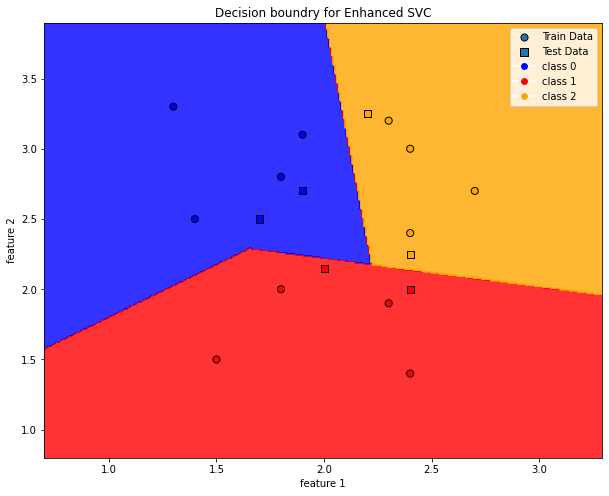

Accuracy of Train for SVC linear kernel using C=100 :  100.0
Accuracy of Test for SVC linear kernel using C=100 :  100.0


In [19]:
# Create the classifier
clf = SVC(kernel='linear', C=100)
# clf = SVC(kernel="linear")

# Train the classifier
clf.fit(X_Train, Y_Train)

# Get the confusion matrix for the training dataset
con_train = confusion_matrix(Y_Train, clf.predict(X_Train))
print("Training Confusion Matrix")
print(con_train)
ConfusionMatrixDisplay.from_predictions(Y_Train, clf.predict(X_Train))

plt.title('Training Confusion Matrix for Enhanced Model')
plt.show()

# Classification Report of test
print("Classification Report of test for enhanced model")
Y_pred_test = clf.predict(X_Train)
print(classification_report(Y_Train, clf.predict(X_Train)))




# Get the confusion matrix for the testing dataset
con_test = confusion_matrix(Y_Test, clf.predict(X_Test))
print("Testing Confusion Matrix")
print(con_test)
ConfusionMatrixDisplay.from_predictions(Y_Test, clf.predict(X_Test))

plt.title('Testing Confusion Matrix for Enhanced Model')
plt.show()

# Classification Report of test
print("Classification Report of test for enhanced model")
Y_pred_test = clf.predict(X_Test)
print(classification_report(Y_Test, clf.predict(X_Test)))



X_all = np.concatenate((X_Train, X_Test))
Y_all = np.concatenate((Y_Train, Y_Test))

plot_decision_boundary(clf, X_Train, X_Test, Y_Train, Y_Test,X_all, Y_all,class_names=['class 0','class 1','class 2'],titles='Decision boundry for Enhanced SVC')
print("Accuracy of Train for SVC linear kernel using C=100 : ",getAccuracy(clf, X_Train, Y_Train))
print("Accuracy of Test for SVC linear kernel using C=100 : ",getAccuracy(clf, X_Test, Y_Test))

# Compare results with the default SVM 
 - we see that when we change C to C=100 the SVC linear kernel is higher than SVC linear kernel with default C=1

# The impact of parameter selection
 - We can improve the accuracy by changing the regularization parameter C to the most fit number

# End of task 1

# Task 2

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# (a) Load the car-evaluation dataset
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
dataset = pd.read_csv('car_evaluation.csv', names=column_names)

# Shuffle the dataset
shuffled_dataset = dataset.sample(frac=1, random_state=42)

# Split the dataset into a training set, validation set, and testing set
train_data, remaining_data = train_test_split(shuffled_dataset, train_size=1000, random_state=42)
valid_data, test_data = train_test_split(remaining_data, train_size=300, random_state=42)

# Separate the features and labels in the training, validation, and testing sets
X_train = train_data.drop('class', axis=1)
y_train = train_data['class']

X_valid = valid_data.drop('class', axis=1)
y_valid = valid_data['class']

X_test = test_data.drop('class', axis=1)
y_test = test_data['class']



In [22]:
# (b) Transform string values into numbers using LabelEncoder
label_encoder = LabelEncoder()
# Iterate over each column in the dataset
for column in X_train.columns:
    # Check if the column data type is object (string)
    if X_train[column].dtype == 'object':
        # Fit the label encoder to the unique values in the column and transform the column
        X_train[column] = label_encoder.fit_transform(X_train[column])

# Now, the string values in the dataset have been transformed into numerical values


# Fit the encoder to the labels and transform them
y_train = label_encoder.fit_transform(y_train)

# Iterate over each column in the dataset
for column in X_valid.columns:
    # Check if the column data type is object (string)
    if X_valid[column].dtype == 'object':
        # Create a label encoder object
        label_encoder = LabelEncoder()
        # Fit the label encoder to the unique values in the column and transform the column
        X_valid[column] = label_encoder.fit_transform(X_valid[column])

# Now, the string values in the dataset have been transformed into numerical values

y_valid = label_encoder.fit_transform(y_valid)

# Iterate over each column in the dataset
for column in X_test.columns:
    # Check if the column data type is object (string)
    if X_test[column].dtype == 'object':
        # Create a label encoder object
        label_encoder = LabelEncoder()
        # Fit the label encoder to the unique values in the column and transform the column
        X_test[column] = label_encoder.fit_transform(X_test[column])


y_test = label_encoder.fit_transform(y_test)




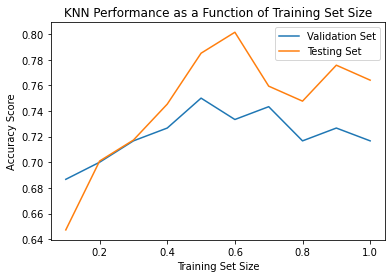

In [23]:
import matplotlib.pyplot as plt

# Define the percentages of training data to use
train_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Initialize empty lists to store accuracy scores
val_scores = []
test_scores = []

# Test the KNN classifier for each value of train_size
# Test the KNN classifier for each value of train_size
for size in train_sizes:
    # Determine the number of samples to use
    num_samples = int(X_train.shape[0] * size)
    
    # Reset the index of the X_train DataFrame
    X_train = X_train.reset_index(drop=True)
    
    # Select a subset of the training data
    X_train_subset = X_train.iloc[:num_samples, :]
    y_train_subset = y_train[:num_samples]
    
    # Create a KNN classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=2, metric = "manhattan")
    
    # Train the classifier on the subset of training data
    knn.fit(X_train_subset, y_train_subset)
    
    # Evaluate the classifier on the validation set
    val_acc = knn.score(X_valid, y_valid)
    val_scores.append(val_acc)
    
    # Evaluate the classifier on the testing set
    test_acc = knn.score(X_test, y_test)
    test_scores.append(test_acc)

# Create a line plot of the accuracy scores as a function of the number of samples
plt.plot(train_sizes, val_scores, label='Validation Set')
plt.plot(train_sizes, test_scores, label='Testing Set')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('KNN Performance as a Function of Training Set Size')
plt.legend()
plt.show()

In [24]:
X_test

,buying,maint,doors,persons,lug_boot,safety
207,3,0,3,2,2,1
310,3,2,3,1,1,2
436,0,3,0,0,1,2
1125,2,2,1,2,2,1
17,3,3,0,1,0,0
...,...,...,...,...,...,...
219,3,2,0,0,1,1
231,3,2,0,1,0,1
862,0,1,3,2,0,2
746,0,2,3,1,0,0


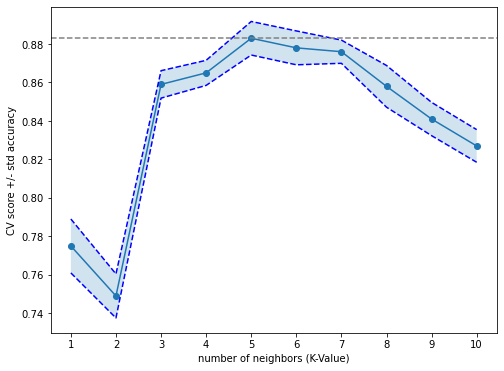

Test set score: 0.89
Final result of the model:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78        95
           1       1.00      0.35      0.52        23
           2       0.91      0.99      0.95       295
           3       1.00      0.73      0.85        15

    accuracy                           0.89       428
   macro avg       0.93      0.70      0.77       428
weighted avg       0.89      0.89      0.88       428



In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the range of K values
n_neighbors = np.linspace(1, 10, 10, dtype=np.int32)

# Define the parameter grid for GridSearchCV
tuned_parameters = [{"n_neighbors": n_neighbors}]

# Perform GridSearchCV to find the best K value
knn = KNeighborsClassifier(n_neighbors=1, metric = "manhattan")
n_folds = 10
clf = GridSearchCV(knn, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X_train, y_train)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]

# Plot the accuracy curve
plt.figure().set_size_inches(8, 6)
plt.plot(n_neighbors, scores, marker="o")
std_error = scores_std / np.sqrt(n_folds)
plt.plot(n_neighbors, scores + std_error, "b--")
plt.plot(n_neighbors, scores - std_error, "b--")
plt.fill_between(n_neighbors, scores + std_error, scores - std_error, alpha=0.2)
plt.ylabel("CV score +/- std accuracy")
plt.xlabel("number of neighbors (K-Value)")
plt.axhline(np.max(scores), linestyle="--", color=".5")
plt.xticks(n_neighbors)
plt.show()

# Train and evaluate the KNN classifier with the best K value
best_k = np.argmax(scores) + 1
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))
print("Final result of the model:\n{}".format(classification_report(y_test, y_pred)))

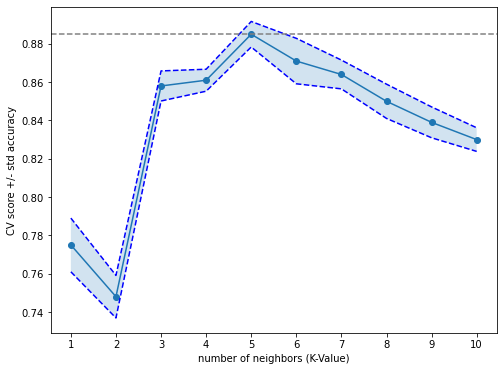

Test set score: 0.89
Final result of the model:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78        95
           1       1.00      0.35      0.52        23
           2       0.91      0.99      0.95       295
           3       1.00      0.73      0.85        15

    accuracy                           0.89       428
   macro avg       0.93      0.70      0.77       428
weighted avg       0.89      0.89      0.88       428



In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the range of K values
n_neighbors = np.linspace(1, 10, 10, dtype=np.int32)

# Define the parameter grid for GridSearchCV
tuned_parameters = [{"n_neighbors": n_neighbors}]

# Perform GridSearchCV to find the best K value
knn = KNeighborsClassifier(n_neighbors=1,metric = "euclidean")
n_folds = 10
clf = GridSearchCV(knn, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X_train, y_train)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]

# Plot the accuracy curve
plt.figure().set_size_inches(8, 6)
plt.plot(n_neighbors, scores, marker="o")
std_error = scores_std / np.sqrt(n_folds)
plt.plot(n_neighbors, scores + std_error, "b--")
plt.plot(n_neighbors, scores - std_error, "b--")
plt.fill_between(n_neighbors, scores + std_error, scores - std_error, alpha=0.2)
plt.ylabel("CV score +/- std accuracy")
plt.xlabel("number of neighbors (K-Value)")
plt.axhline(np.max(scores), linestyle="--", color=".5")
plt.xticks(n_neighbors)
plt.show()

# Train and evaluate the KNN classifier with the best K value
best_k = np.argmax(scores) + 1
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))
print("Final result of the model:\n{}".format(classification_report(y_test, y_pred)))

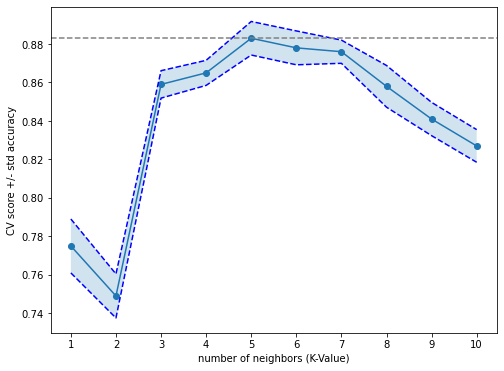

Validation set score: 0.90
Final result of the model:
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        74
           1       0.80      0.50      0.62         8
           2       0.91      0.99      0.95       206
           3       1.00      0.75      0.86        12

    accuracy                           0.90       300
   macro avg       0.90      0.74      0.80       300
weighted avg       0.90      0.90      0.90       300



In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the range of K values
n_neighbors = np.linspace(1, 10, 10, dtype=np.int32)

# Define the parameter grid for GridSearchCV
tuned_parameters = [{"n_neighbors": n_neighbors}]

# Perform GridSearchCV to find the best K value
knn = KNeighborsClassifier(n_neighbors=1, metric="manhattan")
n_folds = 10
clf = GridSearchCV(knn, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X_train, y_train)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]

# Plot the accuracy curve
plt.figure().set_size_inches(8, 6)
plt.plot(n_neighbors, scores, marker="o")
std_error = scores_std / np.sqrt(n_folds)
plt.plot(n_neighbors, scores + std_error, "b--")
plt.plot(n_neighbors, scores - std_error, "b--")
plt.fill_between(n_neighbors, scores + std_error, scores - std_error, alpha=0.2)
plt.ylabel("CV score +/- std accuracy")
plt.xlabel("number of neighbors (K-Value)")
plt.axhline(np.max(scores), linestyle="--", color=".5")
plt.xticks(n_neighbors)
plt.show()

# Train and evaluate the KNN classifier with the best K value
best_k = np.argmax(scores) + 1
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_valid_pred = knn.predict(X_valid)
print("Validation set score: {:.2f}".format(knn.score(X_valid, y_valid)))
print("Final result of the model:\n{}".format(classification_report(y_valid, y_valid_pred)))


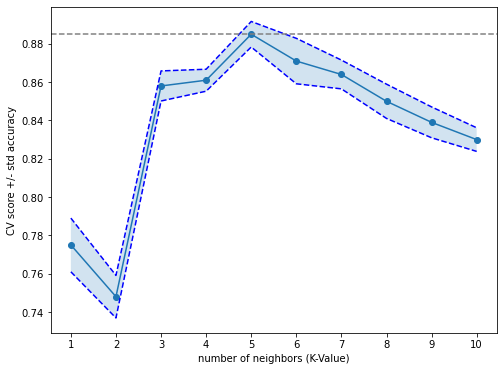

Validation set score: 0.90
Final result of the model:
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        74
           1       0.80      0.50      0.62         8
           2       0.91      0.99      0.95       206
           3       1.00      0.75      0.86        12

    accuracy                           0.90       300
   macro avg       0.90      0.74      0.80       300
weighted avg       0.90      0.90      0.90       300



In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the range of K values
n_neighbors = np.linspace(1, 10, 10, dtype=np.int32)

# Define the parameter grid for GridSearchCV
tuned_parameters = [{"n_neighbors": n_neighbors}]

# Perform GridSearchCV to find the best K value
knn = KNeighborsClassifier(n_neighbors=1, metric = "euclidean")
n_folds = 10
clf = GridSearchCV(knn, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X_train, y_train)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]

# Plot the accuracy curve
plt.figure().set_size_inches(8, 6)
plt.plot(n_neighbors, scores, marker="o")
std_error = scores_std / np.sqrt(n_folds)
plt.plot(n_neighbors, scores + std_error, "b--")
plt.plot(n_neighbors, scores - std_error, "b--")
plt.fill_between(n_neighbors, scores + std_error, scores - std_error, alpha=0.2)
plt.ylabel("CV score +/- std accuracy")
plt.xlabel("number of neighbors (K-Value)")
plt.axhline(np.max(scores), linestyle="--", color=".5")
plt.xticks(n_neighbors)
plt.show()

# Train and evaluate the KNN classifier with the best K value
best_k = np.argmax(scores) + 1
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_valid_pred = knn.predict(X_valid)
print("Validation set score: {:.2f}".format(knn.score(X_valid, y_valid)))
print("Final result of the model:\n{}".format(classification_report(y_valid, y_valid_pred)))


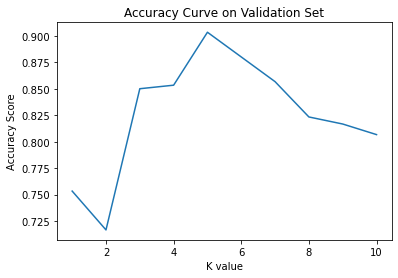

In [29]:
# (d) Use 100% of training samples, find the best K value, and plot the accuracy curve on the validation set

k_values = range(1, 11)
val_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_valid_pred = knn.predict(X_valid)
    val_accuracy = accuracy_score(y_valid, y_valid_pred)
    val_scores.append(val_accuracy)

# Plot the accuracy curve
plt.plot(k_values, val_scores)
plt.xlabel('K value')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Curve on Validation Set')
plt.show()

# Provide your conclusions from the experiments of question (c) and(d) in this question.

in question (c):it generates a line plot of accuracy scores as a function of the number of samples using plt.plot. He labels the x-axis as “training set size,” the y-axis as “accuracy score,” and the title as “KNN performance as a function of training set size.” It also adds a legend using plt. A legend that displays the accuracy scores for the validation set and the test set as two separate lines on the plot. The higher the training, the greater the accuracy.

in question (d):we try K from 1 to 10.then we train model and then make predictions on the validation set. We calculate the accuracy score using the predicted labels and the true labels of the validation set.then we plot the accuracy curve using plt.plot()